<a href="https://colab.research.google.com/github/Rishav-hub/Auto-ts/blob/main/Auto_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

# <center><span style='background :lightyellow' >AUTO TIME-SERIES ANALYSIS</span></center>

## Table of Contents 
- **<a href="#1">What is a time series?</a>**
- **<a href="#2">Auto Timeseries</a>**
- **<a href="#3">Google Colab Setup (Optional)</a>**
- **<a href="#4">Installation of auto-ts</a>**
- **<a href="#5">Auto Timeseries Implementation</a>**

<a id="1"></a>
## 1. What is a time series?

A **`time series`** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, `stock prices over a fixed period of time`, `hotel bookings`, `ecommerce sales`, `weather cycle reports` etc.

**`Time series analysis`** comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. **`Time series forecasting`** is the use of a model to predict future values based on previously observed values.

<a id="2"></a>
## 2. Auto Timeseries
`auto-ts` is an Automated ML library for `time series data`.

- auto-ts enables you to build and select multiple time series models using techniques such as `ARIMA`, `SARIMAX`, `VAR`, `decomposable (trend+seasonality+holidays) models`, and `ensemble machine learning models`.

- `auto-ts`,`Auto_TimeSeries()` is the main function that you will call with your train data. You can then choose what kind of models you want: `stats`, `ml` or `FB prophet` based model. 
- You can also tell it to automatically select the best model based on the scoring parameter you want it to be based on. 
- It will return the best model and a dictionary containing predictions for the number of forecast_periods you mentioned (default=2).

<a id="4"></a>
## 4. Installation of auto-ts
By simple command auto-ts can be installed [link](https://pypi.org/project/auto-ts/)
```cmd
pip install auto-ts
```
or
```cmd
pip3 install auto-ts
```
or
```cmd
pip install git+git://github.com/AutoViML/Auto_TS
```

In [2]:
!pip install auto-ts
!pip install pyyaml==5.4.1
!pip install dask distributed --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 7.8 MB/s 
     |████████████████████████████████| 192.9 MB 77 kB/s 
     |████████████████████████████████| 1.1 MB 60.1 MB/s 
     |████████████████████████████████| 1.4 MB 63.1 MB/s 
     |████████████████████████████████| 596 kB 57.0 MB/s 
     |████████████████████████████████| 140 kB 77.4 MB/s 
     |████████████████████████████████| 9.8 MB 48.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninst

In [2]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id="5"></a>
## 5. Auto Timeseries Implementation

In [1]:
import auto_ts as AT

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [5]:
import pandas as pd
import numpy as np

## Load Dataset

In [71]:
data_path = 'https://raw.githubusercontent.com/Rishav-hub/Auto-ts/main/AAPL_2006-01-01_to_2018-01-01.csv'

In [72]:
dft = pd.read_csv(data_path,usecols=['Date', 'Close'])
print(dft.shape)
dft.head(5)

(3019, 2)


,Date,Close
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [73]:
dft['Date'] = pd.to_datetime(dft['Date'])
dft = dft.sort_values('Date')

In [74]:
dft.head()

,Date,Close
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


## Split dataset

In [75]:
## Spliting the data into train and test data
train_df = dft.iloc[:2800]
test_df = dft.iloc[2800:]
print(train_df.shape, test_df.shape)
train_df.head()

(2800, 2) (219, 2)


,Date,Close
0,2006-01-03,10.68
1,2006-01-04,10.71
2,2006-01-05,10.63
3,2006-01-06,10.90
4,2006-01-09,10.86


In [76]:
score_type = 'rmse'
forecast_period = 219
timeinterval = 'Monthly'
non_seasonal_pdq = (3, 1, 3)
seasonality = True
seasonal_periods = 24

In [77]:
#dft[ts_column] = pd.to_datetime(dft[ts_column].map(lambda x: " 20".join(x.split("-"))))

In [78]:
#dft.to_csv(datapath+filename1,index=False)

## Plot the dataset

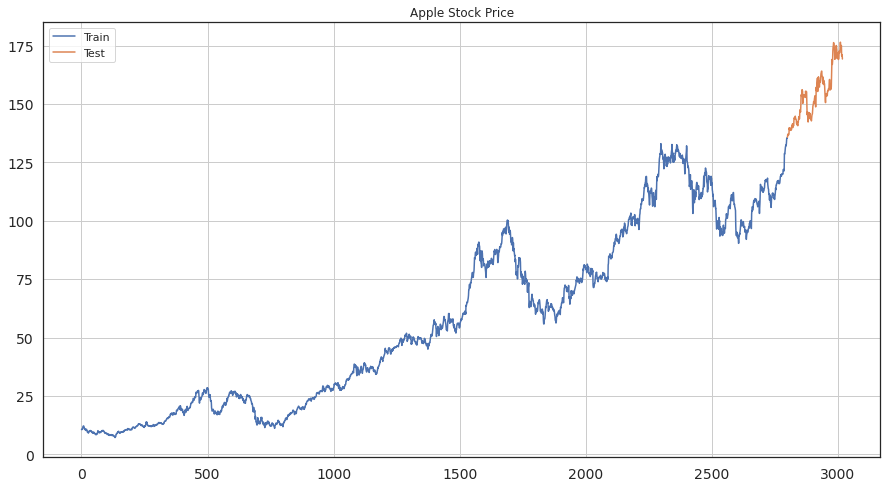

In [79]:
import matplotlib.pyplot as plt

train_df.Close.plot(figsize=(15,8), title= 'Apple Stock Price', fontsize=14, label='Train')
test_df.Close.plot(figsize=(15,8), title= 'Apple Stock Price', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

## Parameters of Auto-ts
***train***: It contains the training set. These are the first 50 entries/data points that trains the model.

***ts_column***: It contains the DateTime of the time series.

***sep***: It specifies the dataset format. Our dataset is comma-separated values (CSV).

***score_type***: It is the scoring metrics for the model. We use the Root Mean Square Error (RMSE). RMSE calculates the error of a model when making predictions. It indicates the absolute fit of the model to the data – how close the observed data points are to the predicted values.

***forecast_period***: It shows the number of months the model will predict. The model will make predictions for the next six months.

***time_interval***: It shows the time interval of the time series. It can be in minutes, hourly, daily, monthly, or yearly. Our dataset has monthly intervals.

***non_seasonal_pdq***: It contains the parameters that train the Non-Seasonal ARIMA model.

***seasonality***: It handles the periodic changes in the time series that occur within a given time. Seasonality shows a regular pattern within the dataset.

***seasonal_period***=12: It shows the monthly seasonality.

***seasonal_PDQ***=None: It contains the parameters that train the Seasonal SARIMAX Model.

***model_type***='best: It shows the types of models that Auto Time Series will use for training. We set the values to best so that Auto Time Series will run multiple time series models and select the best one.

## Initializing the Auto Time Series model

In [80]:
## Running Auto Timeseries and it will check score at various models
ml_dict = AT.auto_timeseries(score_type=score_type, forecast_period=219,
                            time_interval='D', model_type="best",
                            verbose=1)

## Fit it on Data

Start of Fit.....
    Target variable given as = Close
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Close']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (2800, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


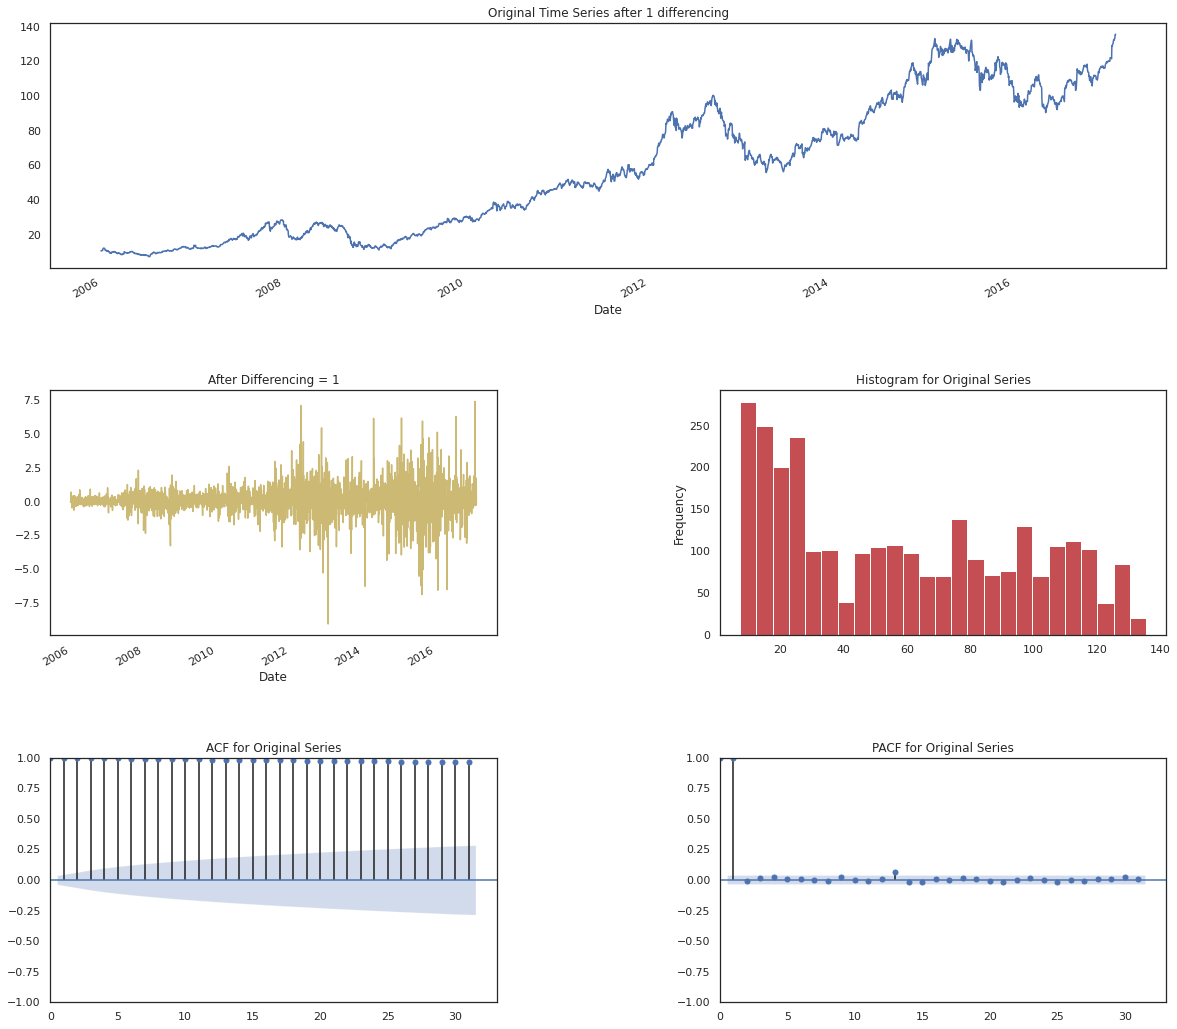

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(2800, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 1705 Test Shape: 219
    RMSE = 38.61
    Std Deviation of actuals = 8.82
    Normalized RMSE (as pct of std dev) = 438%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 1924 Test Shape: 219
    RMSE = 13.60
    Std Deviation of actuals = 7.29
    Normalized RMSE (as pct of std dev) = 187%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 2143 Test Shape: 219
    RMSE = 41.50
    Std Deviation of actuals = 12.00
    Normalized RMSE (as pct of std dev) = 346%
Cross Validation window: 3 completed



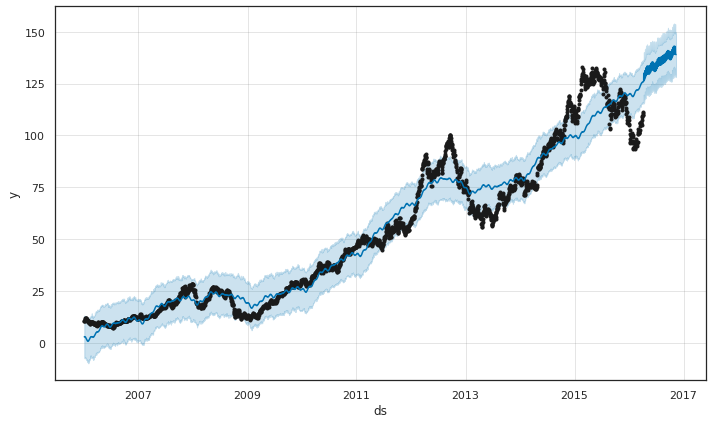

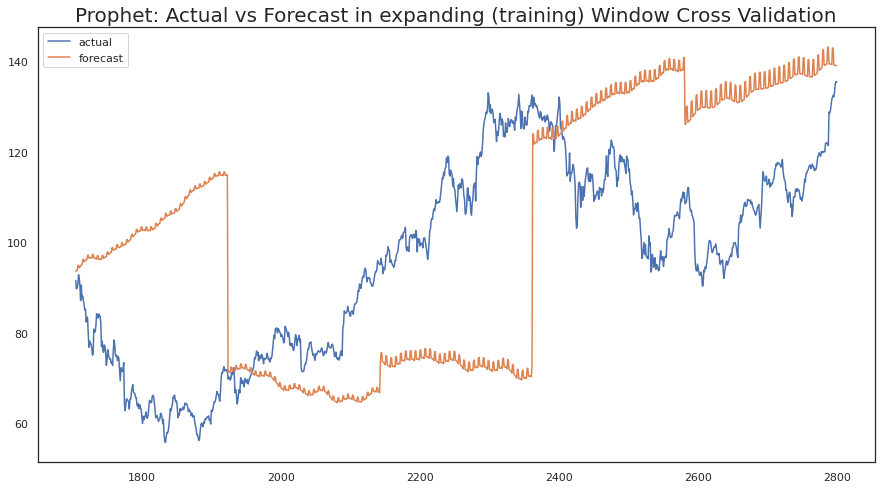

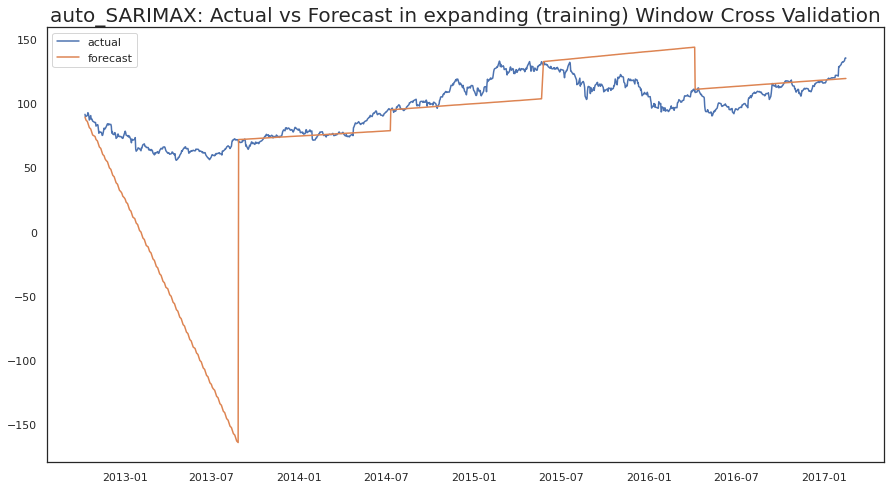

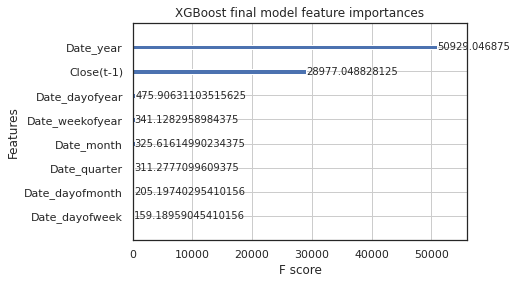

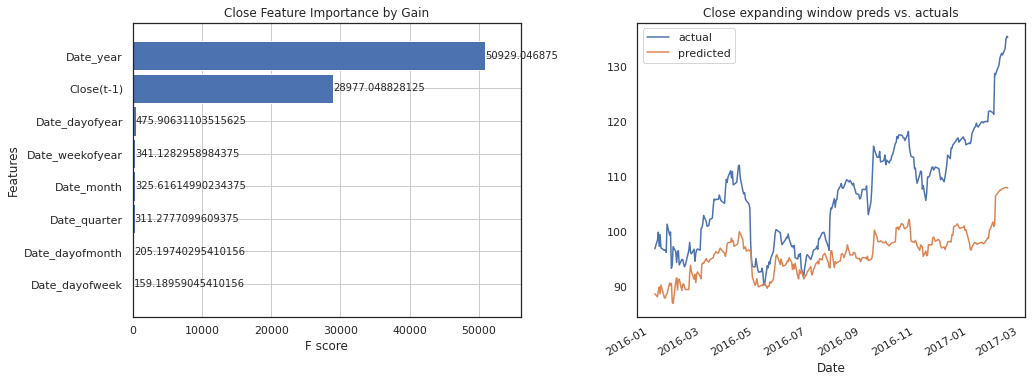

In [81]:
## It shows only predicted values
ml_dict.fit(traindata= train_df, ts_column="Date", target="Close")


## Compare different models

In [82]:
ml_dict.get_leaderboard()

,name,rmse
2,ML,12.495118
0,Prophet,28.980577
1,auto_SARIMAX,37.463192


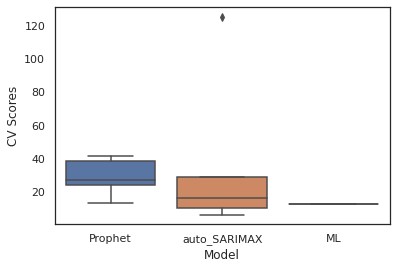

In [83]:
ml_dict.plot_cv_scores()

## Prediction

In [84]:
test_df = test_df.set_index("Date")
train_df = train_df.set_index("Date")


In [85]:
future_predictions = ml_dict.predict(testdata=test_df)


Predicting using test dataframe shape = (219, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Date. Provide strf_time format during "setup" for better results.
ML predictions completed


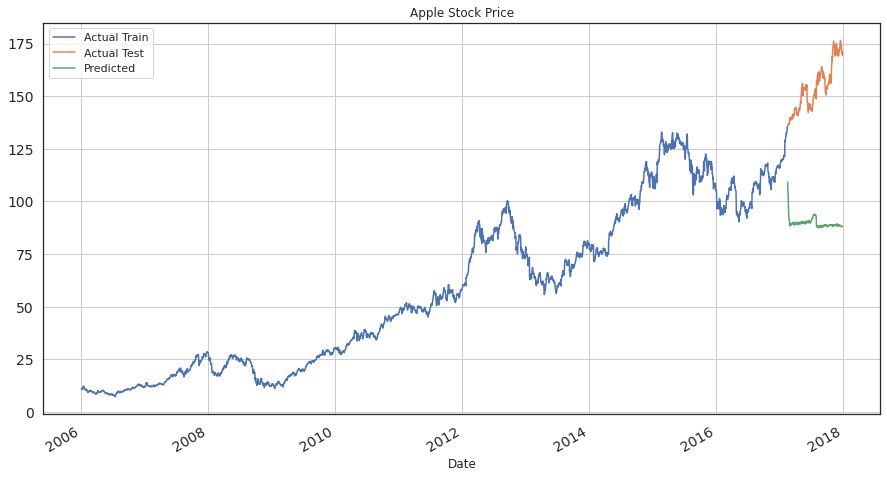

In [86]:
train_df.Close.plot(figsize=(15,8), title= 'Apple Stock Price', fontsize=14, label='Actual Train')

test_df.Close.plot(figsize=(15,8), title= 'Apple Stock Price', fontsize=14, label='Actual Test')
future_predictions['Close'].plot(figsize=(15,8), title= 'Apple Stock Price', fontsize=14, label='Predicted')
plt.legend()
plt.grid()
plt.show()

Int64Index([2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809,
            ...
            3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018],
           dtype='int64', length=219)